In [15]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

# Text Pre-processing libraries
import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

# Tensorflow imports to build the model.
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
warnings.filterwarnings('ignore')
pd.options.display.max_colwidth = 75

In [16]:
df = pd.read_csv("Dataset---Hate-Speech-Detection-using-Deep-Learning.csv")
df

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning ...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in t...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bi...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be t...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @20_Pearls @corey_emanuel r...
24779,2,"you've gone and broke the wrong heart baby, and drove me redneck crazy"
24780,1,young buck wanna eat!!.. dat nigguh like I aint fuckin dis up again
24781,1,youu got wild bitches tellin you lies


In [5]:
df.shape

(24783, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   24783 non-null  int64 
 1   tweet   24783 non-null  object
dtypes: int64(1), object(1)
memory usage: 387.4+ KB


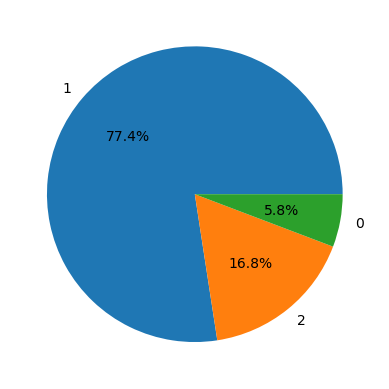

In [8]:
plt.pie(df['class'].value_counts().values,
        labels = df['class'].value_counts().index,
        autopct='%1.1f%%')
plt.show()
# 0 - Hate Speech
# 1 - Offensive Language
# 2 - Neither

In [17]:
# Lower case all the words of the tweet before any preprocessing
df['tweet'] = df['tweet'].str.lower()

# Removing punctuations present in the text
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)

df['tweet']= df['tweet'].apply(lambda x: remove_punctuations(x))
df.head()

,class,tweet
0,2,rt mayasolovely as a woman you shouldnt complain about cleaning up you...
1,1,rt mleew17 boy dats coldtyga dwn bad for cuffin dat hoe in the 1st place
2,1,rt urkindofbrand dawg rt 80sbaby4life you ever fuck a bitch and she st...
3,1,rt cganderson vivabased she look like a tranny
4,1,rt shenikaroberts the shit you hear about me might be true or it might...


In [18]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')

    imp_words = []

    # Storing the important words
    for word in str(text).split():

        if word not in stop_words:

            # Let's Lemmatize the word as well
            # before appending to the imp_words list.

            lemmatizer = WordNetLemmatizer()
            lemmatizer.lemmatize(word)

            imp_words.append(word)

    output = " ".join(imp_words)

    return output


df['tweet'] = df['tweet'].apply(lambda text: remove_stopwords(text))
df.head()

,class,tweet
0,2,rt mayasolovely woman shouldnt complain cleaning house amp man always t...
1,1,rt mleew17 boy dats coldtyga dwn bad cuffin dat hoe 1st place
2,1,rt urkindofbrand dawg rt 80sbaby4life ever fuck bitch start cry confuse...
3,1,rt cganderson vivabased look like tranny
4,1,rt shenikaroberts shit hear might true might faker bitch told ya 57361


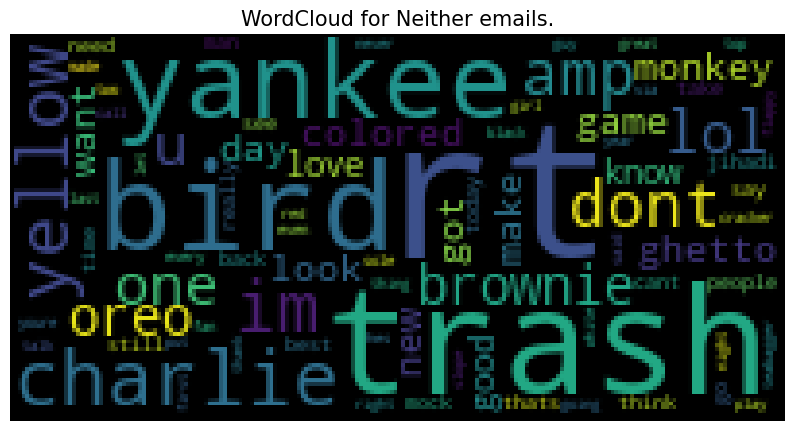

In [19]:
def plot_word_cloud(data, typ):
  # Joining all the tweets to get the corpus
  email_corpus = " ".join(data['tweet'])

  plt.figure(figsize = (10,10))
  
  # Forming the word cloud
  wc = WordCloud(max_words = 100,
                width = 200,
                height = 100,
                collocations = False).generate(email_corpus)
  
  # Plotting the wordcloud obtained above
  plt.title(f'WordCloud for {typ} emails.', fontsize = 15)
  plt.axis('off')
  plt.imshow(wc)
  plt.show()
  print()

plot_word_cloud(df[df['class']==2], typ='Neither')

In [20]:
class_2 = df[df['class'] == 2]
class_1 = df[df['class'] == 1].sample(n=3500)
class_0 = df[df['class'] == 0]

balanced_df = pd.concat([class_0, class_0, class_0, class_1, class_2], axis=0)

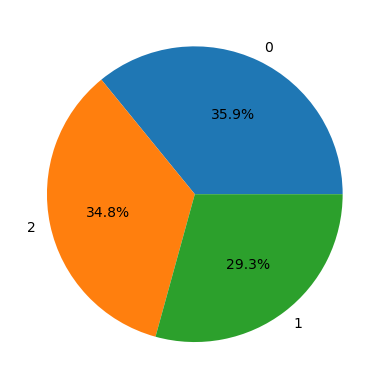

In [21]:
plt.pie(balanced_df['class'].value_counts().values,
        labels=balanced_df['class'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [23]:
balanced_df.shape

(11953, 2)

In [22]:
features = balanced_df['tweet']
target = balanced_df['class']

X_train, X_val, Y_train, Y_val = train_test_split(features,
                                                  target,
                                                  test_size=0.2,
                                                  random_state=22)
X_train.shape, X_val.shape

((9562,), (2391,))

In [24]:
Y_train = pd.get_dummies(Y_train)
Y_val = pd.get_dummies(Y_val)
Y_train.shape, Y_val.shape

((9562, 3), (2391, 3))

In [26]:
# Training the tokenizer
max_words = 5000
token = Tokenizer(num_words=max_words,
                lower=True,
                split=' ')
token.fit_on_texts(X_train)

#Generating token embeddings
Training_seq = token.texts_to_sequences(X_train)
Training_pad = pad_sequences(Training_seq,
                            maxlen=50,
                            padding='post',
                            truncating='post')
Testing_seq = token.texts_to_sequences(X_val)
Testing_pad = pad_sequences(Testing_seq,
                            maxlen=50,
                            padding='post',
                            truncating='post')

In [27]:
model = keras.models.Sequential([
    layers.Embedding(max_words, 32, input_length=max_len),
    layers.Bidirectional(layers.LSTM(16)),
    layers.Dense(512, activation='relu', kernel_regularizer='l1'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Add a dummy input to build the model
model.build((None, max_len))

keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [40]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

es = EarlyStopping(patience=30,
                   monitor = 'val_accuracy',
                   restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 2,
                       monitor = 'val_loss',
                       factor = 0.5,
                       verbose = 0)

In [41]:
# Instantiate Tokenizer
tokenizer = Tokenizer(num_words=max_words)

# Fit on training data
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

# Pad sequences for uniform length
from tensorflow.keras.utils import pad_sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len)

# Now use X_train_padded and X_val_padded in your model.fit()
history = model.fit(X_train_padded, Y_train,
                    validation_data=(X_val_padded, Y_val),
                    epochs=50,
                    verbose=1,
                    batch_size=32,
                    callbacks=[lr, es])

Epoch 1/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - accuracy: 0.9899 - loss: 0.0585 - val_accuracy: 0.8938 - val_loss: 0.4902 - learning_rate: 9.7656e-07
Epoch 2/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.9877 - loss: 0.0612 - val_accuracy: 0.8946 - val_loss: 0.4870 - learning_rate: 9.7656e-07
Epoch 3/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.9894 - loss: 0.0588 - val_accuracy: 0.8946 - val_loss: 0.4859 - learning_rate: 9.7656e-07
Epoch 4/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9882 - loss: 0.0596 - val_accuracy: 0.8938 - val_loss: 0.4899 - learning_rate: 9.7656e-07
Epoch 5/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9891 - loss: 0.0616 - val_accuracy: 0.8929 - val_loss: 0.4920 - learning_rate: 9.7656e-07
Epoch 6/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.9893 - loss: 0.0586 - val_accuracy: 0.8938 - val_loss: 0.4902 - learning_rate: 4.8828e-07
Epoch 7/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/ste

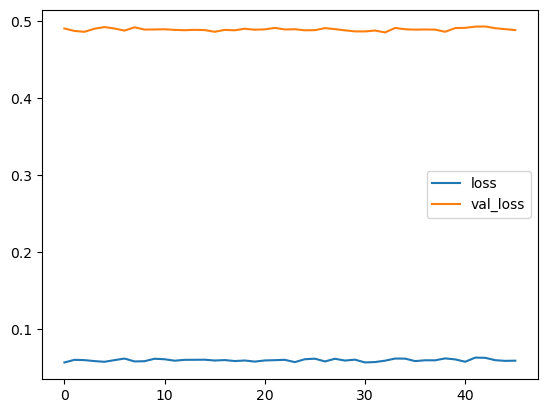

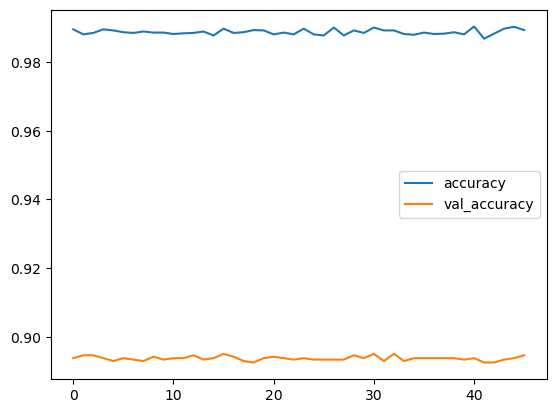

In [42]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

In [61]:
# Sample text to predict
sample_texts = [
    "I love this product! It's amazing.",
    " shit hear might true might faker bitch told ya 57361",
    "one names offensive kike wop kraut wetback jigaboo towelhead gook redskin"
]

# Step 1: Preprocess the text (same as training)
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = remove_punctuations(text)  # Remove punctuations
    text = remove_stopwords(text)  # Remove stopwords
    return text

# Preprocess each sample text
preprocessed_texts = [preprocess_text(text) for text in sample_texts]

# Step 2: Convert the preprocessed text to sequences
sequences = token.texts_to_sequences(preprocessed_texts)

# Step 3: Pad the sequences
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Step 4: Make predictions
predictions = model.predict(padded_sequences)

# Step 5: Interpret the predictions
predicted_classes = np.argmax(predictions, axis=1)

# Display the results
for text, pred in zip(sample_texts, predicted_classes):
    print(f'Text: "{text}" -> Predicted Class: {pred}')
# 0 - Hate Speech
# 1 - Offensive Language
# 2 - Neither

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Text: "I love this product! It's amazing." -> Predicted Class: 2
Text: " shit hear might true might faker bitch told ya 57361" -> Predicted Class: 1
Text: "one names offensive kike wop kraut wetback jigaboo towelhead gook redskin" -> Predicted Class: 0


In [59]:
df[df['class'] == 1]

,class,tweet
1,1,rt mleew17 boy dats coldtyga dwn bad cuffin dat hoe 1st place
2,1,rt urkindofbrand dawg rt 80sbaby4life ever fuck bitch start cry confuse...
3,1,rt cganderson vivabased look like tranny
4,1,rt shenikaroberts shit hear might true might faker bitch told ya 57361
5,1,tmadisonx shit blows meclaim faithful somebody still fucking hoes 12851...
...,...,...
24774,1,really care bout dis bitch dick yo feelings
24775,1,worried bout bitches need
24778,1,yous muthafin lie 8220lifeasking 20pearls coreyemanuel right tl trash 8...
24780,1,young buck wanna eat dat nigguh like aint fuckin dis
